***Authors**: Bartosz Grabek, Filip Kucia*

# Problem Formulation

We consider a linear regression model:

$$ y = X\beta + e \tag{1} $$

where:
- $ y \in \mathcal{R}^N $ is a vector of observations (empirical data) of endogenous variables
- $ X \in \mathcal{R}^{N \times p} $ is a matrix of observations of exogenous variables
- $ \beta \in \mathcal{R}^p $ is a vector of model's parameters
- $ e \in \mathcal{R}^N $ is model's error

We build a linear regression model by solving the following optimization problem:

$$ min_{\beta}\frac{1}{2}||y - X\Beta ||_{2}^{2}, \text{subject to the constraints }||\beta||_{0} \leq k \tag{2} $$

where:
- $k$ is a given natural number not greater than $p$

$ \beta_0 $ denotes the number of nonzero elements of the vector $ \beta $ thus solving the optimization problem gives us the best model's parameters in the sense of the least squares error under **additional assumption** that the number of the model's parameters cannot be greater than $k$:

$$ || \beta ||_{0} = \sum_{i=1}^{p}\mathcal{I}(\beta_i \neq 0), $$

where:
- $\mathcal{I}(.)$ is the indicator function

We aim at building regression models with as few as possible parameters (each exogenous variable in the model requires its forecast).
Approximate solution of the optimization problem can be achieved by solving the problem:

$$ 
\min_{\beta}[\frac{1}{2}||y - X\beta ||_{2}^{2} + \lambda||\beta||_{1 }] 
$$

where:
- $ \lambda $ is a penalty parameter

This is **convex, nondifferentiable** optimization problem, also called LASSO regression.

# LASSO formulations

## Primal Formulation (PG)

### Summary

- **Objective**: Minimize the sum of squared residuals plus an L1 penalty on the coefficients
- **Primal variables**: coefficients of the linear regression model ($\beta$)
- **Objective Function**: 
$$  \min_{\beta} f(\beta) = \min_{\beta} \{ \frac{1}{2n}||y - X\beta ||_{2}^{2} + \lambda||\beta||_{1 } \}$$
- **Gradient calculation**: $$ \nabla_{\beta} f(\beta) = - \frac{1}{n} X^{T}(y-X\beta) + \lambda \text{sign}(\beta) $$
- **Update rule**: $$ \beta^{(t+1)} = \beta^{(t)} - \eta\nabla_{\beta}f(\beta^{(t)}) $$
    where:
    - $\eta$ is the learning rate
    - $t$ is the iteration index


### Gradient derivation

Derivative of the Least Squares (smooth) term:
$$
\frac{\partial}{\partial \beta} \left( \frac{2}{n} \|y - X\beta\|^2_2 \right) = -\frac{2}{n} X^T (y - X\beta)
$$
Derivative of the L1 Regularization term:

Note: the L1 norm of $\beta$ is not differentiable at $\beta=0$, but we may use subgradient at that point, given by:

$$
\text{sign}(\beta) =
\begin{cases} 
1, & \text{if } \beta > 0 \\
-1, & \text{if } \beta < 0 \\
[-1, 1], & \text{if } \beta = 0 
\end{cases}
$$

hence, the derivative of the L1 term is:

$$
\frac{\partial}{\partial \beta} (\lambda \|\beta\|_1) = \lambda \, \text{sign}(\beta)
$$

And the overall gradient is given by:
$$ \nabla_{\beta} f(\beta) = - \frac{1}{n} X^{T}(y-X\beta) + \lambda \text{sign}(\beta) $$

## Dual Formulation (DG) [FIXME: most likely bad formulation]

### Summary

- **Objective**: Maximize a function derived from the primal problem's Lagrangian dual function.
- **Dual variables**: Lagrange multipliers ($\alpha$) associated with the constraints of the primal problem (here: equality constraints)
- **Objective function**: $$ \max_{\alpha} - \frac{1}{2n} || X^{T}(X\alpha - y)||_{2}^{2} - \alpha^{T}y + \frac{1}{2n}||y||_{2}^{2} - \lambda||X^{T}\alpha||_1 $$
where $\alpha$ is the vector of dual variables
- **Gradient calculation**:
$$
\nabla_{\alpha} g(\alpha) = -\frac{1}{n} X (X^T \alpha - y) - \lambda \, \text{sign}(X^T \alpha)
$$

- **Update rule**:
    $$
    \alpha^{(t+1)} = \alpha^{(t)} + \eta \nabla_{\alpha} g(\alpha^{(t)})
    $$
    where:
    - $\eta$ is the learning rate
    - $t$ is the iteration index

### Dual Form Derivation

1. We start from the primal form of the LASSO:

$$  \min_{\beta} f(\beta) = \min_{\beta} \{ \frac{1}{2n}||y - X\beta ||_{2}^{2} + \lambda||\beta||_{1 } \}$$

2. We form the Lagrangian, by introducing a variable $z = X\beta - y$ and rewrite the problem as:

$$ \min_{\beta,z} \left\{ \frac{1}{2n} \lVert z \rVert^2_2 + \lambda \lVert \beta \rVert_1 \right\} \quad \text{s.t. } z = X\beta - y $$ 

Then the Lagrangian $L(\beta, z, \alpha)$ for this constrained problem is:

$$ L(\beta, z, \alpha) = \frac{1}{2n} \lVert z \rVert^2_2 + \lambda \lVert \beta \rVert_1 + \alpha^T (X\beta - y - z) $$

where  $\alpha$ is the dual variable (Lagrange multiplier) associated with the constraint $ z = X\beta-y $
α is the dual variable (Lagrange multiplier) associated with the constraint 



3. We minimize the Lagrangian with respect to primal variables $\beta$ and $z$ to obtain the dual function $g(\alpha)$

$$ g(\alpha) = \min_{\beta, z} \inf \left\{ L(\beta, z, \alpha) \right\} $$

We take the derivative w.r.t $z$ and set it to $0$ to find the minimum w.r.t $z$

$$ \frac{\partial L}{\partial z} = \frac{1}{n} z - \alpha = 0 \implies z = n\alpha $$

We substitute $z = n\alpha$ back into the Lagrangian:

$$
\begin{align*}
L(\beta, z, \alpha) &= \frac{1}{2n} \|n\alpha\|^2_2 + \lambda \| \beta \|_1 + \alpha^T (X\beta - y - n\alpha) \\
&= \frac{n}{2} \| \alpha \|^2_2 + \lambda \| \beta \|_1 + \alpha^T X\beta - \alpha^T y - n\| \alpha \|^2_2 \\
&= -\frac{n}{2} \| \alpha \|^2_2 + \lambda \| \beta \|_1 + \alpha^T X\beta - \alpha^T y
\end{align*}
$$

Now we minimize w.r.t. $\beta$:

$$ \frac{\partial L}{\partial \beta} = \lambda \text{sign}(\beta) + X^T \alpha = 0 \implies \beta = \arg \min_{\beta} (\lambda \| \beta \|_1 + \alpha^T X\beta) $$

We rewrite the term $\alpha^{T}X\beta$ as:

$$ \alpha^T X\beta = \sum_{j=1}^{p} \alpha^T X_j \beta_j $$

For $\beta$ to minimize $\alpha||\beta||_1 + \alpha^{T}X\beta$, each component $\beta_j$ must satisfy:

$$ \beta_j = \arg \min_{\beta_j} (\lambda |\beta_j| + (\alpha^T X_j) \beta_j) $$

which is minimized by:

$$ \beta_j = \begin{cases}
    \arg \min_{\beta_j} (\lambda | \beta_j | + (\alpha^T X_j) \beta_j) & \text{if } |X_j^T \alpha| \leq \lambda \\
    0 & \text{otherwise}
\end{cases}
$$

Substuting back into the Lagrangian, we get:

$$ \max_{\alpha} \left\{ -\frac{n}{2} \| \alpha \|^2_2 - \alpha^T y \right\} \quad \text{s.t. } \| X^T \alpha \|_{\infty} \leq \lambda \text{ for all } j $$

### Gradient Derivation

Using the dual objective function:
$$ \max_{\alpha} - \frac{1}{2n} || X^{T}(X\alpha - y)||_{2}^{2} - \alpha^{T}y + \frac{1}{2n}||y||_{2}^{2} - \lambda||X^{T}\alpha||_1 $$


We take the derivative of the Least Squares Term:

$$
\frac{\partial}{\partial \alpha} \left( -\frac{1}{2n} \|X^T \alpha - y\|_2^2 \right) = -\frac{1}{n} X(X^T \alpha - y)
$$


We take the derivative of the L1 Term:

$$
\frac{\partial}{\partial \alpha} \left( -\lambda \|X^T \alpha\|_1 \right) = -\lambda \, \text{sign}(X^T \alpha)
$$

We combine the derivatives to obtain the gradient of the dual function:

$$
\nabla_{\alpha} g(\alpha) = -\frac{1}{n} X (X^T \alpha - y) - \lambda \, \text{sign}(X^T \alpha)
$$

## Implementation in Python

In [1]:
# Imports
import numpy as np

In [161]:
def lasso_objective(X, y, beta, lambda_):
    """
    Compute the LASSO objective function.
    """
    n = len(y)
    residual = y - np.dot(X, beta)
    loss = 0.5 * np.dot(residual, residual) / n
    penalty = lambda_ * np.linalg.norm(beta, ord=1)
    return loss + penalty


def lasso_gradient(X, y, beta, lambda_):
    """
    Compute the gradient of the LASSO objective function.
    """
    n = len(y)
    residual = y - np.dot(X, beta)
    gradient_loss = -np.dot(X.T, residual) / n
    gradient_penalty = lambda_ * np.sign(beta)
    return gradient_loss + gradient_penalty


def primal_gradient_descent(X, y, lambda_, learning_rate=0.01, max_iterations=1000, tol=1e-6):
    """
    Primal gradient descent for LASSO linear regression.
    """
    n, p = X.shape
    beta = np.zeros(p)  # Initialize coefficients
    loss_history = []

    for _ in range(max_iterations):
        gradient = lasso_gradient(X, y, beta, lambda_)
        beta -= learning_rate * gradient
        
        # Compute current loss
        loss = lasso_objective(X, y, beta, lambda_)
        loss_history.append(loss)
        
        # Check convergence
        if np.linalg.norm(gradient, ord=np.inf) < tol:
            break

    return beta, loss_history


def dual_gradient_descent(X, y, alpha, max_iterations=1000, tolerance=1e-5, learning_rate=0.01):
    n, p = X.shape
    Lambda = np.zeros(p)  # Initialize Lagrange multipliers

    for _ in range(max_iterations):
        # Compute gradient of the objective function with respect to Lambda
        gradient = 2 * (Lambda - y)
        
        # Update Lambda using gradient ascent
        Lambda += learning_rate * gradient
        
        # Apply inequality constraint
        if np.max(np.abs(X.T @ Lambda)) > alpha:
            Lambda *= alpha / np.max(np.abs(X.T @ Lambda))
        
        # Check convergence criteria
        if np.linalg.norm(gradient) < tolerance:
            break

    return Lambda

In [165]:
import numpy as np
from scipy.optimize import minimize

def lagrangian(z, A, b):
    return -np.dot(z, b) - 0.5 * np.linalg.norm(z)**2

def constraint(z, A, lambd):
    return np.max(np.abs(A.T @ z)) - lambd

def dual_lasso(A, b, lambd):
    n = A.shape[1]
    initial_guess = np.zeros(n)
    bounds = [(None, None)] * n  # No bounds on Lagrange multipliers
    
    # Define the optimization problem
    opt_result = minimize(lambda z: -lagrangian(z, A, b), initial_guess, 
                          constraints={'type': 'ineq', 'fun': lambda z: constraint(z, A, lambd)},
                          bounds=bounds)
    
    return opt_result.x

In [162]:
import matplotlib.pyplot as plt

def plot_loss_history(loss_history, method):
    plt.plot(loss_history)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title(f'Loss Function History - {method}')
    plt.grid(True)
    plt.show()


In [168]:
# Generate synthetic data
np.random.seed(0)
n_samples, n_features = 100, 10
X = np.random.randn(n_samples, n_features)
true_beta = np.random.randn(n_features)
y = np.dot(X, true_beta) + np.random.randn(n_samples) * 0.1  # Add some noise

# Define regularization parameter
lambda_ = 0.1  # You can adjust this value as needed
gamma_ = 0.1

# Call the gradient descent methods
beta_primal, loss_history_primal = primal_gradient_descent(X, y, lambda_)
alpha_dual, loss_history_dual = dual_lasso(X, y, lambda_)

# Plot the loss history
plot_loss_history(loss_history_primal, 'Primal Gradient Descent')
plot_loss_history(loss_history_dual, 'Dual Gradient Descent')

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 10 is different from 100)

# Nesterov's Method

As shown in ***Nesterov, Mathematical Programming, Vol. 140, 2013, pp. 126161***

# TODO: Data Generation and Method Testing

# TODO: Evaluation

# Other notes

In [1]:
import numpy as np

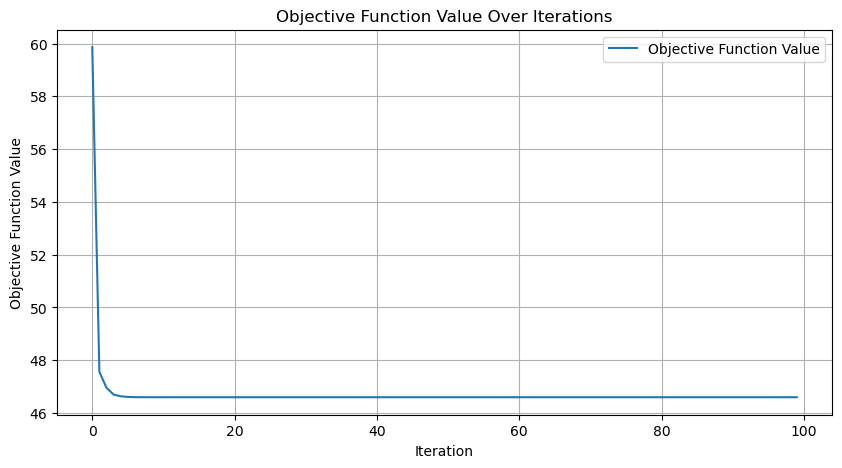

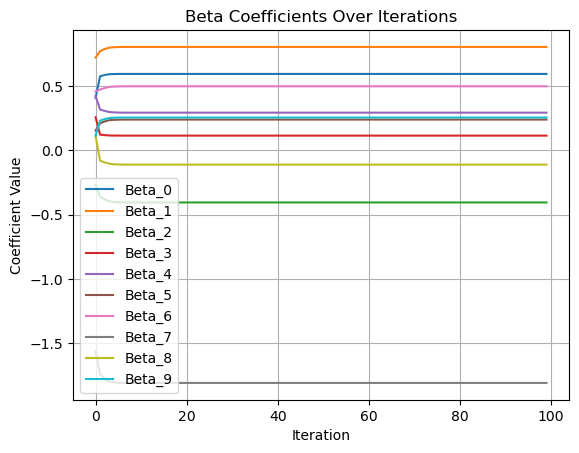

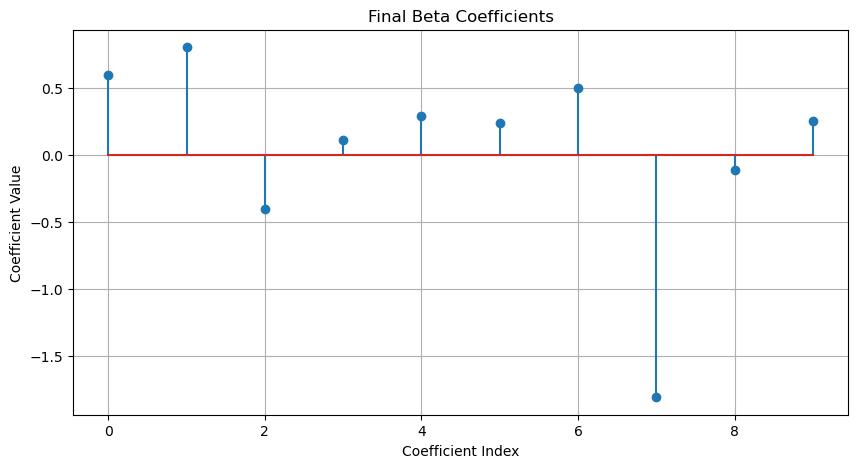

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_of_f(X, y, beta):
    return X.T @ (X @ beta - y)

def proximal_operator(beta, L_inv, lambda_):
    return np.sign(beta) * np.maximum(np.abs(beta) - lambda_ * L_inv, 0)

def phi(X, y, beta, lambda_):
    return 0.5 * np.linalg.norm(y - X @ beta)**2 + lambda_ * np.linalg.norm(beta, 1)

def gradient_iteration(X, y, beta, L, lambda_, gamma_u):
    while True:
        grad = gradient_of_f(X, y, beta)
        T = proximal_operator(beta - grad / L, 1 / L, lambda_)
        if phi(X, y, T, lambda_) <= phi(X, y, beta, lambda_) + grad.T @ (T - beta) + (L / 2) * np.linalg.norm(T - beta)**2:
            break
        L *= gamma_u
    return T, L

def gradient_method(X, y, beta0, L0, gamma_u, gamma_d, lambda_, max_iter):
    beta = beta0
    L = L0
    phi_values = []
    beta_values = []
    
    for k in range(max_iter):
        beta, L = gradient_iteration(X, y, beta, L, lambda_, gamma_u)
        L = max(L0, L / gamma_d)
        phi_values.append(phi(X, y, beta, lambda_))
        beta_values.append(beta.copy())
    
    return beta, phi_values, beta_values

# Example usage
np.random.seed(0)
n, p = 100, 10  # number of samples, number of features
X = np.random.randn(n, p)
y = X @ np.random.randn(p) + np.random.randn(n)
lambda_ = 1.0
beta0 = np.zeros(p)
L0 = 1.0
gamma_u = 2.0
gamma_d = 2.0
max_iter = 100

beta_opt, phi_values, beta_values = gradient_method(X, y, beta0, L0, gamma_u, gamma_d, lambda_, max_iter)

# Plotting the results

# 1. Objective Function Value Over Iterations
plt.figure(figsize=(10, 5))
plt.plot(phi_values, label='Objective Function Value')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.title('Objective Function Value Over Iterations')
plt.legend()
plt.grid(True)
plt.show()

# 2. Beta Coefficients Over Iterations
beta_values = np.array(beta_values)
for i in range(p):
    plt.plot(beta_values[:, i], label=f'Beta_{i}')
plt.xlabel('Iteration')
plt.ylabel('Coefficient Value')
plt.title('Beta Coefficients Over Iterations')
plt.legend()
plt.grid(True)
plt.show()

# 3. Final Beta Coefficients
plt.figure(figsize=(10, 5))
plt.stem(beta_opt)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Final Beta Coefficients')
plt.grid(True)
plt.show()


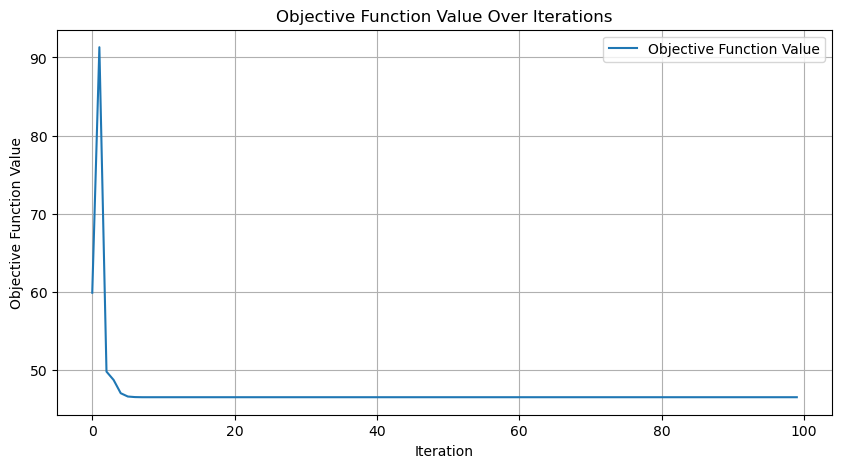

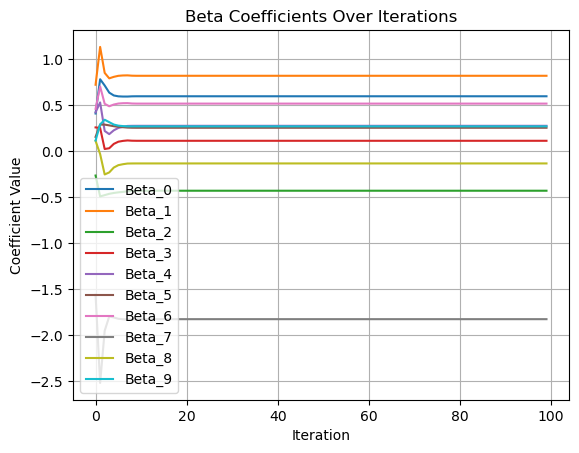

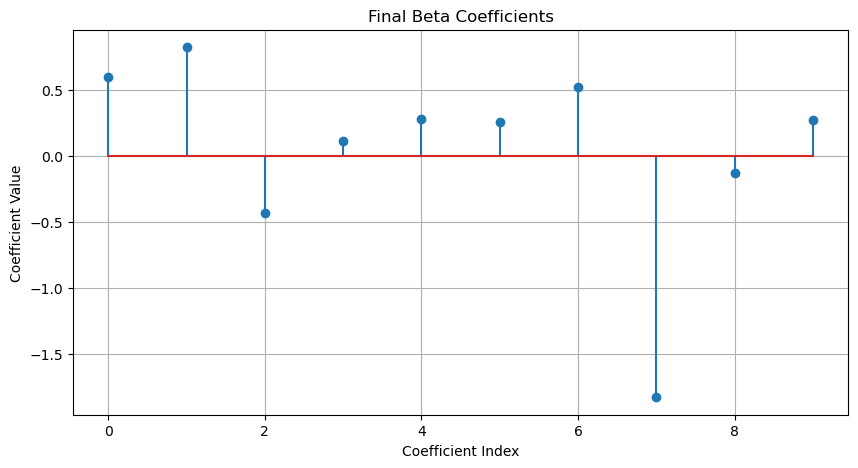

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_of_f(X, y, beta):
    return X.T @ (X @ beta - y)

def proximal_operator(beta, L_inv, lambda_):
    return np.sign(beta) * np.maximum(np.abs(beta) - lambda_ * L_inv, 0)

def phi(X, y, beta, lambda_):
    return 0.5 * np.linalg.norm(y - X @ beta)**2 + lambda_ * np.linalg.norm(beta, 1)

def accelerated_composite_gradient_method(X, y, beta0, L0, gamma_u, gamma_d, lambda_, max_iter, mu):
    beta = beta0
    yk = beta0
    Lk = L0
    Ak = 0
    phi_values = []
    beta_values = []
    
    for k in range(max_iter):
        grad_f_yk = gradient_of_f(X, y, yk)
        L = Lk
        
        while True:
            xk = proximal_operator(yk - grad_f_yk / L, 1 / L, lambda_)
            if phi(X, y, xk, lambda_) <= phi(X, y, yk, lambda_) + grad_f_yk.T @ (xk - yk) + (L / 2) * np.linalg.norm(xk - yk)**2:
                break
            L = L * gamma_u
        
        Lk = max(L0, L / gamma_d)
        ak = 1 / Lk
        Ak += ak
        
        psi_k = 0.5 * np.linalg.norm(xk - beta0)**2 + Ak * (phi(X, y, xk, lambda_) - mu / 2 * np.linalg.norm(xk - beta0)**2)
        psi_k1 = psi_k + ak * (phi(X, y, xk, lambda_) + grad_f_yk.T @ (xk - yk))
        
        yk = xk + ak / Ak * (xk - beta)
        beta = xk
        phi_values.append(phi(X, y, beta, lambda_))
        beta_values.append(beta.copy())
    
    return beta, phi_values, beta_values

# Example usage
np.random.seed(0)
n, p = 100, 10  # number of samples, number of features
X = np.random.randn(n, p)
y = X @ np.random.randn(p) + np.random.randn(n)
lambda_ = 1.0
beta0 = np.zeros(p)
L0 = 1.0
gamma_u = 2.0
gamma_d = 2.0
max_iter = 100
mu = 0.1

beta_opt, phi_values, beta_values = accelerated_composite_gradient_method(X, y, beta0, L0, gamma_u, gamma_d, lambda_, max_iter, mu)

# Plotting the results

# 1. Objective Function Value Over Iterations
plt.figure(figsize=(10, 5))
plt.plot(phi_values, label='Objective Function Value')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.title('Objective Function Value Over Iterations')
plt.legend()
plt.grid(True)
plt.show()

# 2. Beta Coefficients Over Iterations
beta_values = np.array(beta_values)
for i in range(p):
    plt.plot(beta_values[:, i], label=f'Beta_{i}')
plt.xlabel('Iteration')
plt.ylabel('Coefficient Value')
plt.title('Beta Coefficients Over Iterations')
plt.legend()
plt.grid(True)
plt.show()

# 3. Final Beta Coefficients
plt.figure(figsize=(10, 5))
plt.stem(beta_opt)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Final Beta Coefficients')
plt.grid(True)
plt.show()


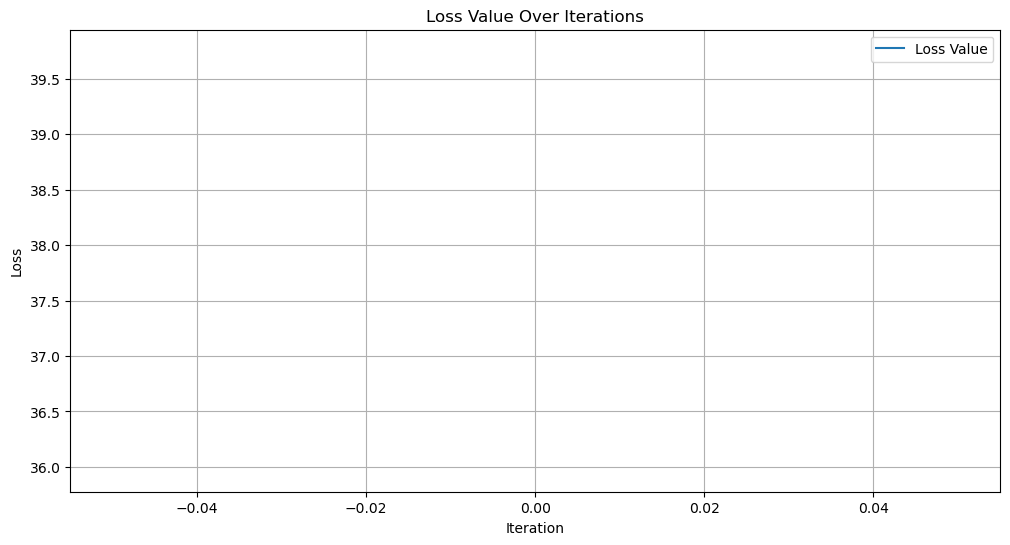

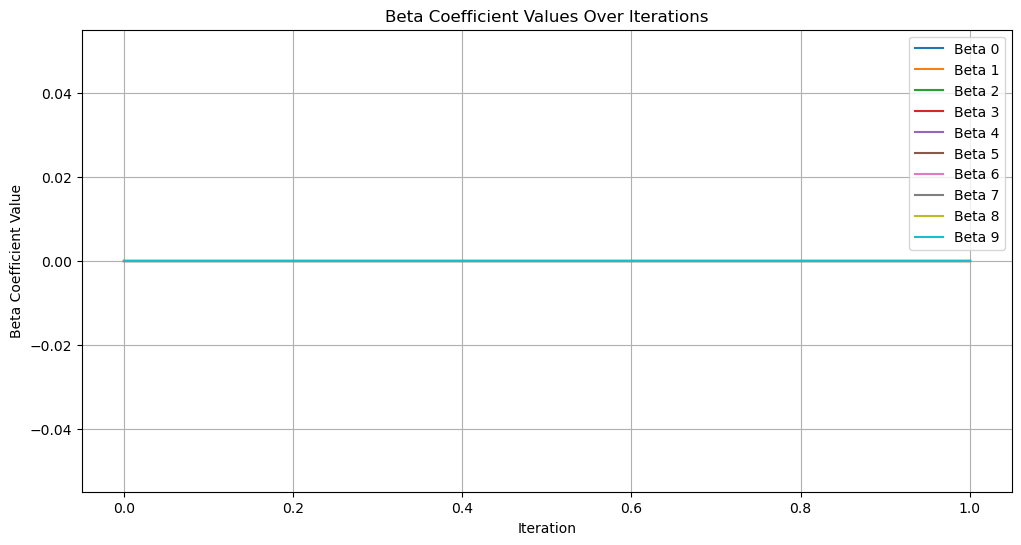

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def proximal_operator_L1(x, L, lambda_):
    """
    Proximal operator for L1 regularization.
    """
    if L == 0:
        L = 1e-6  # Assign a small positive value if L is zero
    return np.sign(x) * np.maximum(np.abs(x) - lambda_ / L, 0)


def gradient_f_LS(A, b, x):
    """
    Gradient of the least squares part of the objective function f(x) = 0.5 * ||Ax - b||^2
    """
    return A.T @ (A @ x - b)

def objective_function_LASSO(A, b, x, lambda_):
    """
    Objective function for LASSO: f(x) = 0.5 * ||Ax - b||^2 + lambda * ||x||_1
    """
    f_x = 0.5 * np.linalg.norm(A @ x - b)**2
    h_x = lambda_ * np.linalg.norm(x, 1)
    return f_x + h_x

def accelerated_method_lasso(A, b, x0, L0, mu, lambda_, max_iter=1000, tol=1e-6):
    gamma_u = 2
    gamma_d = 2
    xk = x0
    Ak = 0
    Lk = L0
    vk = x0
    psi_k = lambda x: 0.5 * np.linalg.norm(x - x0)**2
    
    loss_values = []
    beta_values = [x0.copy()]
    
    for k in range(max_iter):
        L = Lk
        
        while True:
            # Solve for a
            a = (2 * (1 + mu * Ak) / L)**0.5
            # Update y
            y = np.divide((Ak * xk + a * vk), (Ak + a), out=np.zeros_like(xk), where=(Ak + a) != 0)
            # Compute proximal mapping
            T_L_y = proximal_operator_L1(y - gradient_f_LS(A, b, y) / L, 1 / L, lambda_)
            # Check the stopping condition
            grad_T_L_y = gradient_f_LS(A, b, T_L_y)
            if np.dot(grad_T_L_y, y - T_L_y) < np.linalg.norm(grad_T_L_y)**2 / L:
                L *= gamma_u
            else:
                break
        
        yk = y
        Mk = L
        ak1 = a
        Lk = Mk / gamma_d
        xk1 = T_L_y
        Ak += ak1
        
        # Update psi_k+1
        psi_k = lambda x, psi_k=psi_k, ak1=ak1, xk1=xk1: (psi_k(x) + 
                ak1 * (objective_function_LASSO(A, b, xk1, lambda_) + 
                np.dot(gradient_f_LS(A, b, xk1), x - xk1) + 
                0.5 * np.linalg.norm(x - xk1)**2))
        
        # Track loss and beta values
        loss_values.append(objective_function_LASSO(A, b, xk1, lambda_))
        beta_values.append(xk1.copy())
        
        # Check convergence
        if np.linalg.norm(xk1 - xk) < tol:
            break
        
        xk = xk1
        vk = xk + ak1 * (xk - vk) / Ak
    
    return xk, loss_values, beta_values

# Example usage
A = np.random.randn(100, 10)  # Feature matrix
b = np.random.randn(100)      # Target vector
x0 = np.zeros(10)             # Initial guess
L0 = 0.1                      # Initial estimate of Lipschitz constant
mu = 0.0                      # Convexity parameter (0 for LASSO)
lambda_ = 1.0                 # Regularization parameter

solution, loss_values, beta_values = accelerated_method_lasso(A, b, x0, L0, mu, lambda_)

# Plotting the loss function
plt.figure(figsize=(12, 6))
plt.plot(loss_values, label='Loss Value')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Value Over Iterations')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the beta coefficients
beta_values = np.array(beta_values)
plt.figure(figsize=(12, 6))
for i in range(beta_values.shape[1]):
    plt.plot(beta_values[:, i], label=f'Beta {i}')
plt.xlabel('Iteration')
plt.ylabel('Beta Coefficient Value')
plt.title('Beta Coefficient Values Over Iterations')
plt.legend()
plt.grid(True)
plt.show()
